### Francisco Antonio Molina Bakhos

# Proyecto Kaggle: Churn Score

En primer lugar, vamos a ver de qué va nuestro dataset y vamos a tratar de limpiarlo de la mejor manera posible minimizando la pérdida de información

In [6]:
import pandas as pd

df = pd.read_csv('archive/train.csv')
pd.set_option('display.max_columns', None)
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


Como podemos ver en las primeras muestras, el dataset consiste en una serie de datos personales de clientes de una página web. Nuestro objetivo será predecir la "churn_risk_score", que es una medida del riesgo que hay de que el cliente abandone la página web en algún momento.

Si nos fijamos en todos los datos que nos da el dataset, podemos ver que algunos de ellos son completamente irrelevantes: customer_id, name, security_no... Para asegurarnos completamente de ello, vamos a ver cual es el total de muestras de nuestro dataset y vamos a comprobar la cantidad de valores únicos para cada uno de los datos.

In [7]:
df.shape[0]

36992

El número de muestras de nuestro dataset es de 36.992. Vamos a comprobar el número de valores únicos por dato.

In [13]:
for col in df.columns:
    print(col, ":", len(df[col].unique()))

customer_id : 36992
Name : 36992
age : 55
gender : 3
security_no : 36992
region_category : 4
membership_category : 6
joining_date : 1096
joined_through_referral : 3
referral_id : 11359
preferred_offer_types : 4
medium_of_operation : 4
internet_option : 3
last_visit_time : 30101
days_since_last_login : 27
avg_time_spent : 25961
avg_transaction_value : 36894
avg_frequency_login_days : 1654
points_in_wallet : 23700
used_special_discount : 2
offer_application_preference : 2
past_complaint : 2
complaint_status : 5
feedback : 9
churn_risk_score : 6


Como podemos ver, aquellos datos que sean cualitativos y que tengan tantos valores únicos como muestras hay en el dataset los podemos eliminar. Estos son: customer_id, name, securiy_no y referral_id (este último se añade por ser un identificador, ya que no todos los clientes de las muestras tienen un referral_id). Por ahora, eliminamos los mencionados y dejamos el resto de columnas. 

In [17]:
df = df.drop(['customer_id', 'Name', 'security_no', 'referral_id'], axis=1)
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


Ya nos hemos deshecho de información irrelevante. Ahora vamos a analizar el dataset en busca de valores nulos, y vamos a decidir que hacer con ellos. Primero, chequeamos que columnas tienen valores nulos Nan.

In [22]:
for col in df.columns:
    print(col, ":", df[col].isnull().values.any(), "-->", df[col].isnull().sum())

age : False --> 0
gender : False --> 0
region_category : True --> 5428
membership_category : False --> 0
joining_date : False --> 0
joined_through_referral : False --> 0
preferred_offer_types : True --> 288
medium_of_operation : False --> 0
internet_option : False --> 0
last_visit_time : False --> 0
days_since_last_login : False --> 0
avg_time_spent : False --> 0
avg_transaction_value : False --> 0
avg_frequency_login_days : False --> 0
points_in_wallet : True --> 3443
used_special_discount : False --> 0
offer_application_preference : False --> 0
past_complaint : False --> 0
complaint_status : False --> 0
feedback : False --> 0
churn_risk_score : False --> 0


Tenemos muchos valores nulos en las columnas region_category y points_in_wallet, junto con algunos en preferred_offer_types. Vamos a examinar las tres columnas

In [23]:
print(df['region_category'].unique())

['Village' 'City' 'Town' nan]


Como solo hay cuatro categorias posibles en esta columna, y una gran parte de ellas son valores nulos, vamos a substituir los Nans por una nueva categoria que será 'Unknown'.

In [26]:
df['region_category'] = df['region_category'].fillna('Unknown')
print(df['region_category'].unique())
print(df['region_category'].isnull().values.any(), "-->", df['region_category'].isnull().sum())

['Village' 'City' 'Town' 'Unknown']
False --> 0


Vamos con points_in_wallet.

In [29]:
print(len(df['points_in_wallet'].unique()))

23700


Se trata de una columna cuyo valor es continuo y donde el 10% aproximadamente de las muestras son de un valor nulo. Podemos ver el histograma de valores y comprobar a ver si podemos substituir los valores por un valor representativo, o es mejor deshacernos de ellos.

array([[<AxesSubplot:title={'center':'points_in_wallet'}>]], dtype=object)

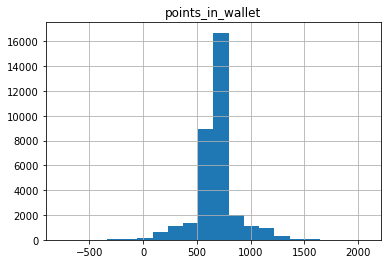

In [31]:
df.hist(column='points_in_wallet', bins=20)

Como podemos ver en el histograma, los valores estan muy concentrados en el centro. Por lo tanto, es buena idea sustituirlos por la media. De esta manera, evitamos la pérdida de un 10% de la información, a pesar de añadir redundancia en una de las columnas.

array([[<AxesSubplot:title={'center':'points_in_wallet'}>]], dtype=object)

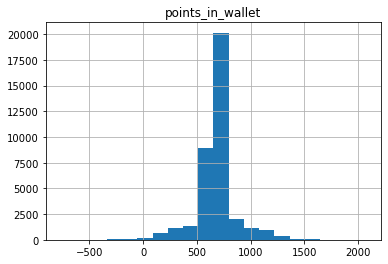

In [32]:
df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].mean())
df.hist(column='points_in_wallet', bins=20)

Como podemos ver, la forma del histograma no ha cambiado de manera significativa. Vamos con la última columna con valores nulos, preferred_offer_types.

In [33]:
print(df['preferred_offer_types'].unique())

['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]


Como son muy pocas muestras (288) las que tienen valores nulos, podemos eliminarlas en lugar de modificar la información.

In [37]:
df = df[df['preferred_offer_types'].notna()]
print(df['preferred_offer_types'].unique())
df.shape[0]

['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers']


36704

Una vez hecho esto, vamos a buscar valores en las columnas que estan fuera del rango que parece plausible (valores anómalos). Luego veremos que hacer con ellos. 